In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy as scc
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D,Conv2DTranspose, Add, ReLU, Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Flatten

2023-12-23 18:24:07.278324: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-23 18:24:07.281414: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 18:24:07.330814: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 18:24:07.331977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-23 18:24:08.211168: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
# It is Recommended to use tensorflow version 2.12.0 to avoid any king of error
print(tf.__version__)


2.12.0


In [4]:
training_path= "/home/aniruddha/Brain Tumor Classification Project/assets/Training"
testing_path = "/home/aniruddha/Brain Tumor Classification Project/assets/Testing"

In [5]:
training_data, validation_data =  tf.keras.utils.image_dataset_from_directory(
                                                                              training_path,
                                                                              validation_split = 0.2,
                                                                              subset = "both",
                                                                              labels ='inferred',
                                                                              label_mode = "int",
                                                                              color_mode = "grayscale",
                                                                              shuffle = True,
                                                                              seed = 123,
                                                                              image_size = (256,256),
                                                                              batch_size = 16
                                                                             )

print("Completed loading traning data and validation data")

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Using 574 files for validation.
Completed loading traning data and validation data


2023-12-23 18:24:10.653027: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-23 18:24:10.653593: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
testing_data=  tf.keras.utils.image_dataset_from_directory(
                                                            testing_path,
                                                            labels ='inferred',
                                                            label_mode = "int",
                                                            color_mode = "grayscale",
                                                            shuffle = True,
                                                            seed = 123,
                                                            image_size = (256,256),
                                                            batch_size = 16
                                                            )
                                                                              

print("Completed loading testing data")

Found 394 files belonging to 4 classes.
Completed loading testing data


In [7]:
class_names = training_data.class_names
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [8]:
class_names = testing_data.class_names
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


2023-12-23 18:24:10.854382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2296]
	 [[{{node Placeholder/_4}}]]
2023-12-23 18:24:10.854837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2296]
	 [[{{node Placeholder/_0}}]]


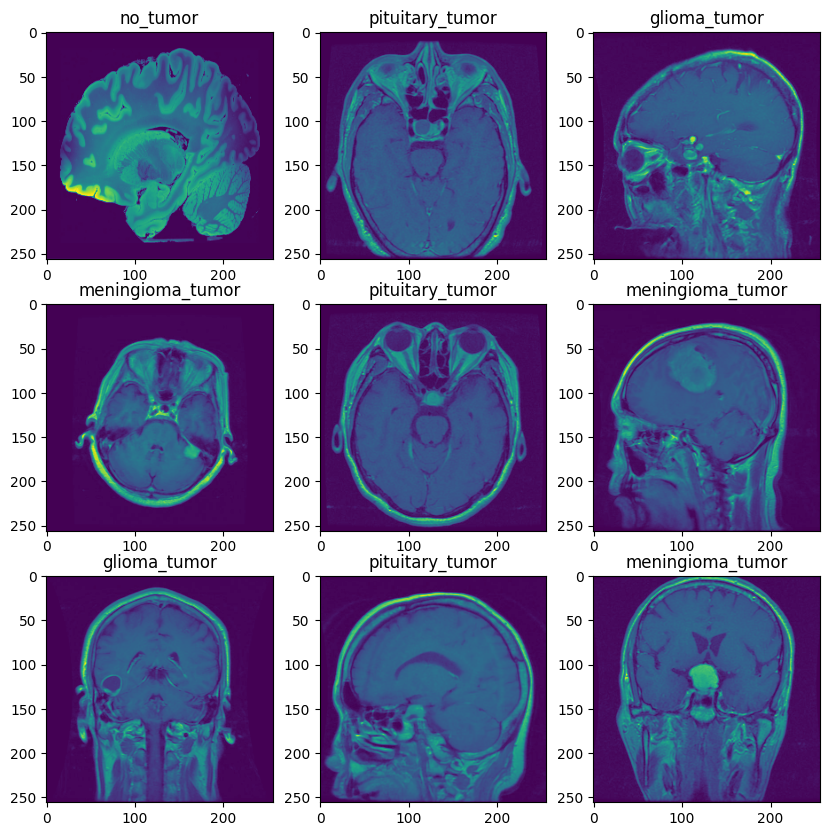

In [9]:
# Data before Normalization of Training Data
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze().astype("uint8"))
        plt.title(class_names[labels[i]])

2023-12-23 18:24:12.411477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [394]
	 [[{{node Placeholder/_0}}]]
2023-12-23 18:24:12.411872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [394]
	 [[{{node Placeholder/_4}}]]


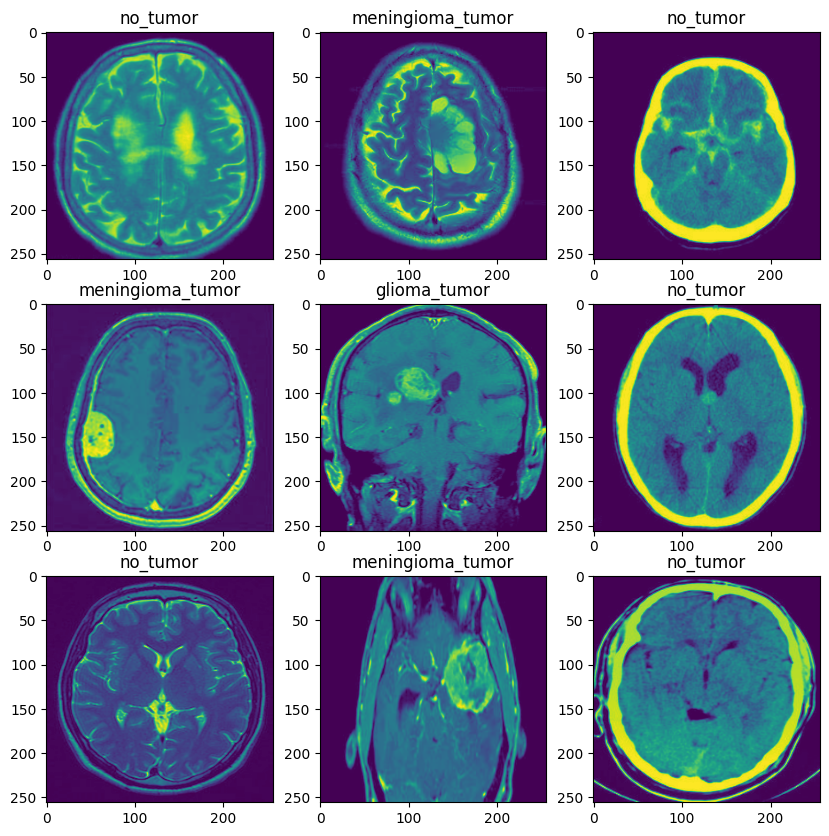

In [10]:
# Data before Normalization of Testing Data
plt.figure(figsize=(10, 10))
for images, labels in testing_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze().astype("uint8"))
        plt.title(class_names[labels[i]])

In [11]:
def preprocess_image(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.image.per_image_standardization(image)
    
    return image, label

In [12]:
training_data = training_data.map(preprocess_image)
validation_data = validation_data.map(preprocess_image)
testing_data = testing_data.map(preprocess_image)

2023-12-23 18:24:14.255654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2296]
	 [[{{node Placeholder/_4}}]]
2023-12-23 18:24:14.256056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2296]
	 [[{{node Placeholder/_4}}]]


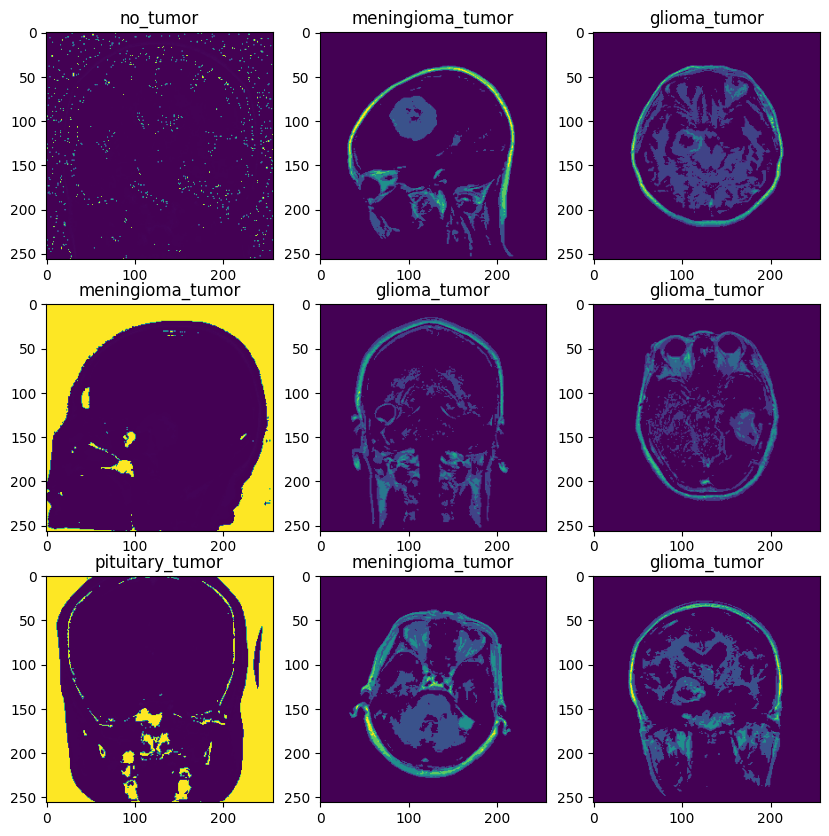

In [13]:
# Data after Normalization of training Data
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze().astype("uint8"))
        plt.title(class_names[labels[i]])

2023-12-23 18:24:15.731581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [394]
	 [[{{node Placeholder/_4}}]]
2023-12-23 18:24:15.732103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [394]
	 [[{{node Placeholder/_0}}]]


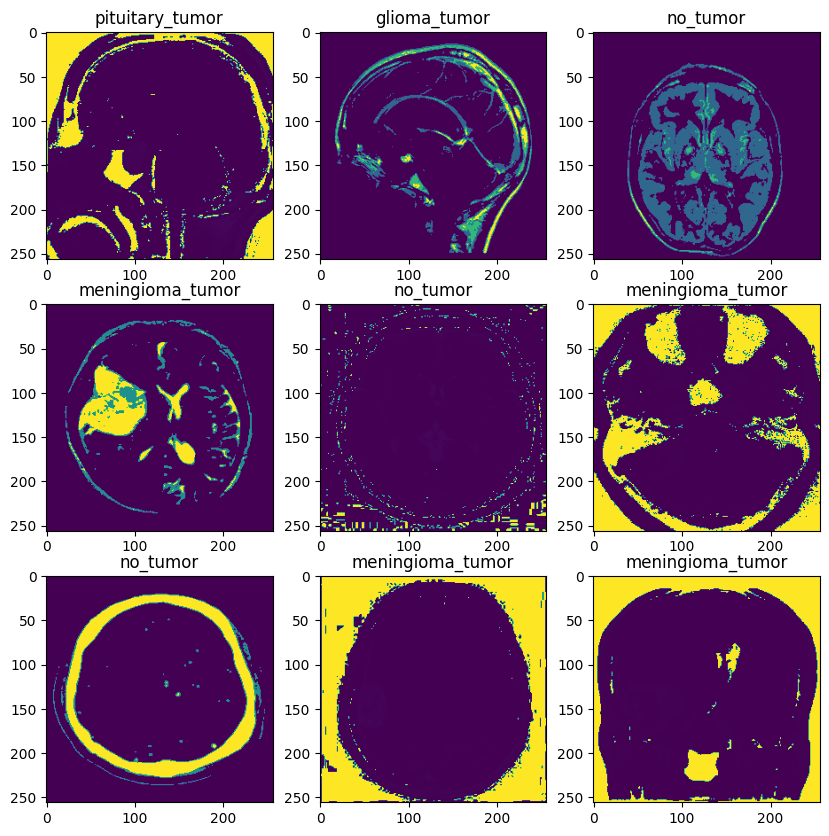

In [14]:
# Data after Normalization of testing Data
plt.figure(figsize=(10, 10))
for images, labels in testing_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze().astype("uint8"))
        plt.title(class_names[labels[i]])

In [15]:
# # Loading and processing the Testing Data
# def load_and_preprocess_image(file_path, target_size=(150, 150)):
#     image = load_img(file_path, target_size=target_size,color_mode="grayscale")
#     image_array = img_to_array(image)
#     image_array = np.expand_dims(image, axis=0)
#     image = tf.image.per_image_standardization(image_array)
#     # image = preprocess_image(image_array,None)
#     return image

# labels = os.listdir(testing_path)
# image_dict = {}
# for i in labels:
#     sub_list = os.listdir(os.path.join(testing_path,i))
#     image_dict[i] = sub_list

# test_images = []
# targets = []
# for j in  list(image_dict.keys()):
#     for k in image_dict[j]:
#         image_path = os.path.join(testing_path,j,k)
#         image = load_and_preprocess_image(image_path)
#         test_images.append(image.numpy())
#         targets.append(j)
# test_data = {"Images" : test_images, "Targets" : targets}
# test_data = pd.DataFrame(test_data)
# test_data.head()

In [ ]:
# # Testing Data
# plt.imshow(test_data["Images"][0].squeeze())
# plt.title(test_data["Targets"][0])
# plt.show()

In [ ]:
# # Shuffle testing data by using sample()
# data = test_data.sample(frac=1)
# X_test = np.array(list(data["Images"]))
# y_test = np.array(list(data["Targets"]))
# encoder = LabelBinarizer()
# y_test = encoder.fit_transform(data["Targets"])
# y_test = y_test.squeeze()
# X_test = X_test.squeeze()
# X_test.shape
# plt.imshow(X_test[0])
# plt.show()

In [16]:
# Inception Module(Inspired from Googlenet)
class inception_module():
    def __init__(self, filters, **kwargs):
        super(inception_module, self).__init__(**kwargs)
        self.filters = filters
        # First middle layer
        self.conv_1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')
        ###########################################################################
        # Second middle layer
        self.conv_2 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')
        self.conv_3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')
        ############################################################################
        # Third middle layer
        self.conv_4 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')
        self.conv_5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')
        ##############################################################################
        # Fourth middle layer
        self.maxpool_build = MaxPooling2D((3, 3), strides=(1, 1), padding='same')
        self.conv_6 = Conv2D(filters[5], (1, 1), padding='same', activation='relu')
    def get_config(self):
        config = super(inception_module, self).get_config()
        config.update({'filters': self.filters})
        return config
    def call(self,x):
        conv1 = self.conv_1(x)
        conv2 = self.conv_2(x)
        conv3 = self.conv_3(conv2)
        conv4 = self.conv_4(x)
        conv5 = self.conv_5(conv4)
        maxpool = self.maxpool_build(x)
        conv6 = self.conv_6(maxpool)

        inception_block = concatenate([conv1, conv3, conv5, conv6], axis=-1)
        return inception_block


In [17]:
# Residual Block(Inspired from Resnet)
class residual_block(tf.keras.layers.Layer):
    def __init__(self, filters, **kwargs):
        super(residual_block, self).__init__(**kwargs)
        self.filters = filters
        element_sum = filters[0] + filters[2] + filters[4] + filters[5]
        self.conv_shortcut = Conv2D(element_sum, (1, 1), padding='same')
        self.norm = tf.keras.layers.BatchNormalization()
        self.mid_conv_1 = Conv2D(element_sum, (3, 3), padding='same', activation='relu')
        self.mid_conv_2 = Conv2D(element_sum, (5, 5), padding='same', activation='relu')
        self.inception_1 = inception_module(filters=filters)
        self.inception_2 = inception_module(filters=filters)
        self.inception_3 = inception_module(filters=filters)
    def get_config(self):
        config = super(residual_block, self).get_config()
        config.update({'filters': self.filters})
        return config
    @tf.function(experimental_relax_shapes=True)
    def call(self, x):
        shortcut = self.conv_shortcut(x)

        # Layer 1
        incep_1 = self.inception_1.call(x)
        inception_1_norm = self.norm(incep_1)
        x = ReLU()(inception_1_norm)

        # Layer 2
        mid_layer_1 = self.mid_conv_1(x)
        mid_layer_2 = self.mid_conv_2(mid_layer_1)
        mid_norm = self.norm(mid_layer_2)
        x = ReLU()(mid_norm)

        # Layer 3
        incep_3 = self.inception_3.call(x)
        inception_3_norm = self.norm(incep_3)
        x = ReLU()(inception_3_norm)

        # Output
        x = Add()([x, shortcut])
        x = self.norm(x) 
        x = ReLU()(x)
        return x

In [ ]:
# Model architecture
model = Sequential([
                    Conv2D(16, (7,7),activation="relu", strides=(2,2), padding='same'),
                    tf.keras.layers.BatchNormalization(),
                    ReLU(),
                    MaxPooling2D((3,3), strides=(2,2), padding='same'),
                    ])
model.add(residual_block(filters=[64,128,32,32,96,16]))
model.add(residual_block(filters=[192,208,48,64,96,16]))
# model.add(Add())
# model.add(residual_block(filters=[112,288,64,64,144,32]))
# model.add(residual_block(filters=[256,320,128,128,192,48]))
model.add(AveragePooling2D((7,7),strides=(1,1)))
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(400,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.compile(optimizer='adam',loss=scc(),metrics=['accuracy'])
model.build((None,250,250,1))
model.summary()

In [ ]:
inputs = tf.keras.Input((256,256,1))
# Down scaling
conv1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(inputs)
conv1 = residual_block(filters=[4,16,4,16,4,4])(conv1)
conv1 = Dropout(0.1)(conv1)
# conv1 = tf.keras.layers.BatchNormalization()(conv1)
conv1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv1)
pool1 = MaxPooling2D((2,2), padding = "same")(conv1)
conv2 = Conv2D(32,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool1)
conv2 = residual_block(filters=[8,32,8,32,8,8])(conv2)
conv2 = Dropout(0.2)(conv2)
# conv2 = tf.keras.layers.BatchNormalization()(conv2)
conv2 = Conv2D(32,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv2)
pool2 = MaxPooling2D((2,2), padding = "same")(conv2)
conv3 = Conv2D(64,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool2)
conv3 = residual_block(filters=[16,64,16,64,16,16])(conv3)
conv3 = Dropout(0.2)(conv3)
# conv3 = tf.keras.layers.BatchNormalization()(conv3)
conv3 = Conv2D(64,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv3)
pool3 = MaxPooling2D((2,2), padding = "same")(conv3)
conv4 = Conv2D(128,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool3)
conv4 = residual_block(filters=[32,128,32,128,32,32])(conv4)
# conv4 = Dropout(0.1)(conv4)
# conv4 = tf.keras.layers.BatchNormalization()(conv4)
conv4 = Conv2D(128,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv4)
pool4 = MaxPooling2D((2,2), padding = "same")(conv4)
conv5 = Conv2D(256,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool4)
conv5 = residual_block(filters=[64,256,64,256,64,64])(conv5)
# conv5 = Dropout(0.1)(conv5)
# conv5 = tf.keras.layers.BatchNormalization()(conv5)
conv5 = Conv2D(256,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv5)
# Upscaling
up6 = Conv2DTranspose(128,(2,2), strides = (2,2), padding = "same")(conv5)
up6 = tf.keras.layers.concatenate([up6,conv4])
conv6 = Conv2D(128,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(up6)
conv6 = residual_block(filters=[32,128,32,128,32,32])(conv6)
# conv6 = Dropout(0.1)(conv6)
# conv6 = tf.keras.layers.BatchNormalization()(conv6)
conv6 = Conv2D(128,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv6)
up7 = Conv2DTranspose(64,(2,2), strides = (2,2), padding = "same")(conv6)
up7 = tf.keras.layers.concatenate([up7,conv3])
conv7 = Conv2D(64,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(up7)
conv7 = residual_block(filters=[16,64,16,64,16,16])(conv7)
# conv7 = Dropout(0.1)(conv7)
# conv7 = tf.keras.layers.BatchNormalization()(conv7)
conv7 = Conv2D(64,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv7)
up8 = Conv2DTranspose(32,(2,2), strides = (2,2), padding = "same")(conv7)
up8 = tf.keras.layers.concatenate([up8,conv2])
conv8 = Conv2D(32,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(up8)
conv8 = residual_block(filters=[8,32,8,32,8,8])(conv8)
# conv8 = Dropout(0.1)(conv8)
# conv8 = tf.keras.layers.BatchNormalization()(conv8)
conv8 = Conv2D(32,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv8)
up9 = Conv2DTranspose(16,(2,2), strides = (2,2), padding = "same")(conv8)
up9 = tf.keras.layers.concatenate([up9,conv1])
conv9 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(up9)
conv9 = residual_block(filters=[4,16,4,16,4,4])(conv9)
# conv9 = Dropout(0.1)(conv9)
# conv9 = tf.keras.layers.BatchNormalization()(conv9)
conv9 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv9)
# conv9 = Conv2D(1,(1,1), activation = "relu")(conv9)
drop =Dropout(0.1)(conv9)
flap = Flatten()(drop)
den = Dense(40,activation = "relu")(flap)
output = Dense(4,activation = "softmax")(den)
model = tf.keras.models.Model(inputs,output)
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

In [ ]:
# Training our model on 10 epoch
checkpointer = tf.keras.callbacks.ModelCheckpoint("Tumor_detector.h5", verbose=1, save_best_only=True)
callbacks = [
                tf.keras.callbacks.EarlyStopping(patience=3,monitor="val_loss"),
                tf.keras.callbacks.TensorBoard(log_dir="logs")
            ]
history = model.fit(training_data,
                    validation_data=validation_data,
                    epochs=1000,
                    callbacks=callbacks,
                    batch_size=16)

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

In [ ]:
# Visualization of some useful graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Saving the model
model.save("model.h5",overwrite=True)

In [ ]:
# Load the pre trained model
custom_objects = {'residual_block': residual_block}

with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model("model2.h5")


# Evaluate the model on the testing data

In [ ]:
# Test it
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
evaluation_results = model.evaluate(testing_data)

# Print the evaluation results
print("Test Loss:", evaluation_results[0])
print(f"Test Accuracy: { evaluation_results[1]*100}%")


In [20]:

import tkinter as tk
from tkinter import font
from tkinter import filedialog
from tkinter import ttk
from PIL import Image, ImageTk
import math

def browse_file():
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg"),("Image files", "*.png"),("Image files", "*.jepg")])
        if file_path:
            load_and_display_image(file_path)
            image_path.set(file_path)
            main.set(True)

def reset_image():
    global accuracy
    canvas.delete("reset_image")
    entry_var.set("")
    if main.get():
        if image_path.get() != "":
            for i in range(math.ceil(accuracy)+1,0,-1):
                progress_var.set(i)
                percentage_label.config(text=f"{i}%")
                root.update_idletasks()
                root.after(10)
            percentage_label.config(text=f"{0}%")
            root.update_idletasks()
        else:
             shaker(10)
        image_path.set("")
    else:
         shaker(10)

def detect():
    global prediction, accuracy
    if main.get():
        try:
            img = load_img(image_path.get(), color_mode='grayscale', target_size=(256, 256))
            img_array = img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)
            img_preprocessed, _ = preprocess_image(img_array, label=None)
            prediction = model.predict(img_preprocessed)
            classes = ['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor']
            accuracy = prediction[0][np.argmax(prediction)]*100
            entry_var.set(classes[np.argmax(prediction)])
            for i in range(math.ceil(accuracy)+1):
                progress_var.set(i)
                percentage_label.config(text=f"{i}%")
                root.update_idletasks()
                root.after(20)
            percentage_label.config(text=f"{accuracy}%")
            root.update_idletasks()
        except:
             shaker(10)
    else:
        shaker(10)

def load_and_display_image(file_path):
        canvas.delete("invalid_warning")
        pil_image = Image.open(file_path)
        resized_image = pil_image.resize((680, 460))
        tk_image = ImageTk.PhotoImage(resized_image)
        canvas.image = tk_image
        canvas.create_image(350, 80, anchor=tk.NW, image=tk_image, tags="reset_image")

def close_window():
    root.destroy()

def shaker(n): 
    main.set(False)
    num = -10
    for j in range(n):
        next_num = -1*num
        canvas.delete("imagecontainer")
        canvas.create_rectangle(320-num,50,1060-num,570, fill="green", tags="imagecontainer")
        if j == 0 :
            num = 2*next_num
        else:
             num = next_num
        canvas.update_idletasks()
        canvas.after(100)
    canvas.delete("imagecontainer")
    canvas.create_rectangle(320,50,1060,570, fill="green", tags="imagecontainer")
    canvas.create_text(650,300,text="Please select an Image", fill='red', font=font.Font(family="Helvetica", size=18, weight="bold"), tags="invalid_warning")

# path of the model
model_path = "/home/aniruddha/Brain Tumor Classification Project/model.h5"

# loading model with custom object residual block
custom_objects = {'residual_block': residual_block}
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)
# Root and Canvas
root = tk.Tk()
canvas = tk.Canvas(root,width=1080, height=720 ,bg="lightblue")
root.title("Tumor Detector")
root.geometry("1080x720")
root.minsize(1080,720)
# All Variables
progress_var = tk.DoubleVar()
entry_var = tk.StringVar()
image_path = tk.StringVar()
main = tk.BooleanVar()
# Designing in the whole canvas
custom_font = font.Font(family="Helvetica", size=18, weight="bold")
entry = tk.Entry(root, width=25, textvariable=entry_var)
progress_bar = ttk.Progressbar(root, variable=progress_var, length=400, mode="determinate")
button1 = tk.Button(root, text="Select Images", background="yellow", fg="black", padx= 30, pady=10, font=custom_font, command=browse_file)
button2 = tk.Button(root, text="Detect", background="yellow", fg="black", padx= 80, pady=10, font=custom_font, command=detect)
button3 = tk.Button(root, text="Reset", background="yellow", fg="black", padx= 80, pady=10, font=custom_font, command= reset_image)
button4 = tk.Button(root, text="Exit", background="yellow", fg="black", padx= 90, pady=10, font=custom_font, command=close_window)
percentage_label = tk.Label(root, text="0%", font=("Helvetica", 14))
label = tk.Label(root,text="  Brain Tumor Detector and Classifier  ", background="#FF9999", fg="black",font=font.Font(family="Helvetica", size=20, weight="bold"))
canvas.create_rectangle(20,50,300,650, fill="green")
canvas.create_rectangle(320,50,1060,570, fill="green", tags="imagecontainer")
canvas.create_rectangle(320,580,570,680, fill="green")
canvas.create_rectangle(580,580,1060,680, fill="green")
button_window1 = canvas.create_window(40, 100, anchor=tk.NW, window=button1)
button_window2 = canvas.create_window(40, 250, anchor=tk.NW, window=button2)
button_window3 = canvas.create_window(40, 400, anchor=tk.NW, window=button3)
button_window4 = canvas.create_window(40, 550, anchor=tk.NW, window=button4)
progress_window = canvas.create_window(600, 620, anchor=tk.NW, window=progress_bar)
entry_window1 = canvas.create_window(340,620, anchor=tk.NW, window=entry)
percentage_label_window = canvas.create_window(1010,625, anchor=tk.NW, window=percentage_label)
label = canvas.create_window(420,10, anchor=tk.NW, window=label)
canvas.create_text(160,70,text="<<<-----------Menu----------->>>",fill='White', font=font.Font(family="Helvetica", size=16, weight="bold"))
canvas.create_text(430,600,text="Detection Result",fill='yellow', font=font.Font(family="Helvetica", size=18, weight="bold"))
canvas.create_text(830,600,text="Accuracy ",fill='yellow', font=font.Font(family="Helvetica", size=18, weight="bold"))
# Design packed
canvas.pack()
root.mainloop()

1/1 [==============================] - 0s 203ms/step
